In [1]:
import os
import numpy as np
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("../src/")

In [3]:
%load_ext autoreload
%autoreload 2

In [40]:
from torch.utils.data import DataLoader
from utils.data_loading import MEOIDataset

In [41]:
data_dir = '../AD/'

In [42]:
dataset = MEOIDataset(data_dir, 1.0)
loader_args = dict(batch_size = 1, num_workers=os.cpu_count(), pin_memory=True)
train_loader = DataLoader(dataset, shuffle=True, drop_last=True, **loader_args)

  0%|          | 0/2560 [00:00<?, ?it/s]

In [43]:
image = None
mask = None
for batch in train_loader:
    images, true_masks = batch['image'], batch['mask']
    image = images[0]
    mask = true_masks[0]
    break
dem = image[-1,:,:]
image = image[:-1,:,:]    

In [44]:
print("Shapes:", image.shape, dem.shape, mask.shape)
print("Depths:", image.dtype, dem.dtype, mask.dtype)
print("Range:", (image.min(), image.max()),(dem.min(), dem.max()), (mask.min(), mask.max()))

Shapes: torch.Size([3, 64, 64]) torch.Size([64, 64]) torch.Size([64, 64])
Depths: torch.float16 torch.float16 torch.bool
Range: (tensor(0.1843, dtype=torch.float16), tensor(0.6626, dtype=torch.float16)) (tensor(0., dtype=torch.float16), tensor(255., dtype=torch.float16)) (tensor(False), tensor(True))


In [45]:
plt.imshow(image.permute(1,2,0))

Error in callback <function _draw_all_if_interactive at 0x7fadd1b4a0e0> (for post_execute):


ValueError: Unsupported dtype

ValueError: Unsupported dtype

<Figure size 640x480 with 1 Axes>

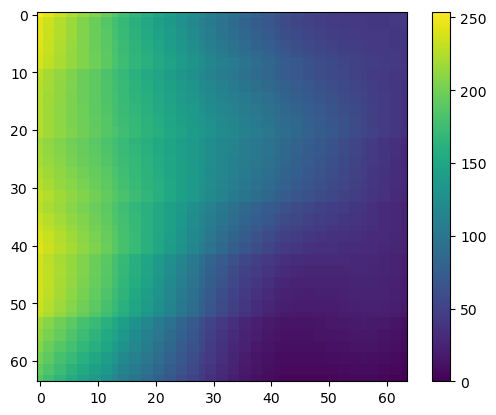

In [ ]:
plt.imshow(dem)
plt.colorbar()

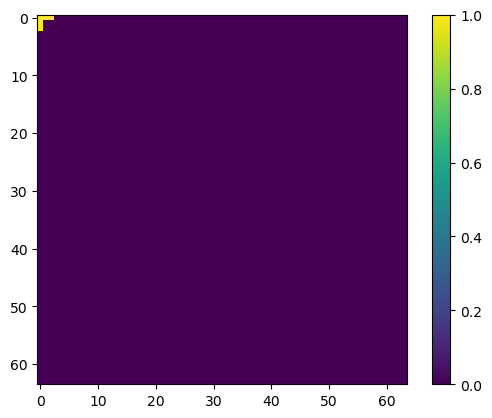

In [ ]:
plt.imshow(mask)
plt.colorbar()